<a href="https://colab.research.google.com/github/ming-AA/ai-study/blob/main/Chap4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Chap4. 다양한 분류 알고리즘

# 4-1. 로지스틱 회귀

In [ ]:
# 데이터 준비
import pandas as pd
fish = pd.read_csv('https://bit.ly/fish_csv')
fish.head()

,Species,Weight,Length,Diagonal,Height,Width
0,Bream,242.0,25.4,30.0,11.5200,4.0200
1,Bream,290.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,26.5,31.1,12.3778,4.6961
3,Bream,363.0,29.0,33.5,12.7300,4.4555
4,Bream,430.0,29.0,34.0,12.4440,5.1340


In [ ]:
print(pd.unique(fish['Species']))

['Bream' 'Roach' 'Whitefish' 'Parkki' 'Perch' 'Pike' 'Smelt']


In [ ]:
# 입력 데이터 생성
fish_input = fish[['Weight', 'Length', 'Diagonal', 'Height', 'Width']].to_numpy()
print(fish_input[:5])

[[242.      25.4     30.      11.52     4.02  ]
 [290.      26.3     31.2     12.48     4.3056]
 [340.      26.5     31.1     12.3778   4.6961]
 [363.      29.      33.5     12.73     4.4555]
 [430.      29.      34.      12.444    5.134 ]]


In [ ]:
# 타깃 데이터 생성
fish_target = fish['Species'].to_numpy()

In [ ]:
# 훈련 세트 테스트 세트 나누기
from sklearn.model_selection import train_test_split
train_input, test_input, train_target, test_target = train_test_split(fish_input, fish_target, random_state=42)

In [ ]:
# 데이터 전처리 - 표준화
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
ss.fit(train_input)
train_scaled = ss.transform(train_input)
test_scaled = ss.transform(test_input)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
# k-최근접 이웃 모델 생성
kn = KNeighborsClassifier(n_neighbors=3) # 이웃 개수 3
# 훈련
kn.fit(train_scaled, train_target)
# 평가
print(kn.score(train_scaled, train_target))
print(kn.score(test_scaled, test_target))

0.8907563025210085
0.85


In [ ]:
print(kn.classes_) # KNeighborsClassifier에 정렬된 타깃값 출력, classes_ 속성

['Bream' 'Parkki' 'Perch' 'Pike' 'Roach' 'Smelt' 'Whitefish']


In [ ]:
print(kn.predict(test_scaled[:5])) # 테스트 세트에 있는 처음 5개 샘플의 타깃값 예측

['Perch' 'Smelt' 'Pike' 'Perch' 'Perch']


In [ ]:
import numpy as np
proba = kn.predict_proba(test_scaled[:5]) # predict_proba() 클래스별 확률값 반환, 처음 5개 샘플에 대한 확률
print(np.round(proba, decimals=4)) # dicimals 소수점 네번째 자리까지 반올림하여 표기
# 결과 각각의 종에 대한 확률

[[0.     0.     1.     0.     0.     0.     0.    ]
 [0.     0.     0.     0.     0.     1.     0.    ]
 [0.     0.     0.     1.     0.     0.     0.    ]
 [0.     0.     0.6667 0.     0.3333 0.     0.    ]
 [0.     0.     0.6667 0.     0.3333 0.     0.    ]]


In [ ]:
distances, indexes = kn.kneighbors(test_scaled[3:4])
print(test_scaled[3:4])
print(train_target[indexes])

[[-0.34698097 -0.23396068 -0.22320459 -0.11905019 -0.12233464]]
[['Roach' 'Perch' 'Perch']]




---



## 로지스틱 회귀
* 선형 방정식을 사용한 분류 알고리즘
* 선형 회귀와 동일하게 선형 방정식을 학습함
* 선형 회귀와 달리 시그모이드 함수나 소프트맥스 함수를 사용하여 클래스 확률을 출력
* $ z = a * (Weight) + b * (length) + c * (Diagonal) + d * (Height) + e * (Width) + f $
* a,b,c,d,e는 가중치 혹은 계수
* z는 어떤 값도 가능하나, 확률이 되려며 0~1(또는 0 ~ 100%) 사이 값이 되어야 함

**다중 분류**
* 타깃 클래스가 2개 이상인 분류 문제
* 로지스틱 회귀는 다중 분류를 위해 소프트맥스 함수를 사용하여 클래스 예측함

**시그모이드 함수 (로지스틱 함수)**
* 하나의 선형 방정식의 출력값을 0~1사이로 압축하여 이진 분류를 위해 사용함
* z가 아주 큰 음수일 때 0이 되고, z가 아주 큰 양수일 때 1이 되도록 바꾸는 방법
* z가 무한하게 큰 음수일 경우 함수는 0에 가까워짐
* z가 무한하게 큰 양수일 경우 함수는 1에 가까워짐
* z가 0이 될 때는 0.5가 됨
* z가 어떤 값이 되더라도 절대로 0~1사이의 범위를 벗어날 수 없음
* 그래서 0~1사이 값을 0 ~ 100%까지 확률로 해석 가능
* **이진 분류**에서 확률을 계산하기 위해 사용

**소프트맥스 함수**
* 다중 분류에서 여러 개의 선형 방정식의 출력값을 0~1사이로 압축하고 합이 1이 되도록 만듬
* **다중 분류**에서 z값을 확률로 계산하기 위해 사용
* 이를 위해 지수 함수 사용, 정규화된 지수 함수라고도 부름

## 핵심 패키지와 함수

**1) scikit-learn**

LogisticRegreesion()
* 로지스틱 회귀를 위한 클래스
* 반복적인 알고리즘 사용
* max_iter 매개변수로 반복횟수 지정
* 릿지 회귀와 같이 계수의 제곱을 규제 = L2 규제
* penalty 매개변수에서 L2(릿지), L1(라쏘) 규제 방식을 선택 가능함
* 규제를 제어하는 매개변수는 C. 기본값은 1
* C는 aplpha와 반대로 작을수록 규제가 커짐

predict_proba() 
* 예측 확률값 반환
* 이진 분류의 경우, 음성 클래스와 양성 클래스에 대한 확률 반환
* 다중 분류의 경우, 모든 클래스에 대한 확률을 반환

decision_function()
* 모델이 학습한 선형 방정식의 출력을 반환
* 이진 분류의 경우, 양성 클래스에 대한 z값 계산
* 다중 분류의 경우, 각 클래스마다 선형 방정식(z) 계산. 가장 큰 값의 클래스가 예측 클래스가 됨

exp()
* 지수 함수 계산

expit()
* scipy 라이브러리
* 시그모이드 함수

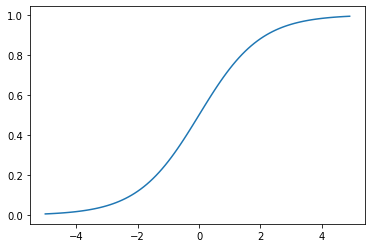

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
z = np.arange(-5, 5, 0.1) # -5와 5 사이에 0.1 간격으로 배열 z를 만듬
phi = 1 / (1 + np.exp(-z)) # z 위치마다 시그모이드 함수 계산
plt.plot(z, phi)
plt.show()

In [ ]:
char_arr = np.array(['A', 'B', 'C', 'D', 'E']) # 불리언 인덱싱
print(char_arr[[True, False, True, False, False ]])

['A' 'C']




---



In [ ]:
# 도미와 빙어만 분류
bream_smelt_indexes = (train_target == 'Bream') | (train_target == 'Smelt')
train_bream_smelt = train_scaled[bream_smelt_indexes]
target_bream_smelt = train_target[bream_smelt_indexes]

# 로지스틱 회귀 모델 이진 분류 수행
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(train_bream_smelt, target_bream_smelt)
print(lr.predict(train_bream_smelt[:5])) # 처음 5개 샘플 예측

['Bream' 'Smelt' 'Bream' 'Bream' 'Bream']


In [ ]:
print(lr.predict_proba(train_bream_smelt[:5])) # 음성 클래스에 대한 확률, 양성 클래스에 대한 확률
print(lr.classes_) # 빙어(Smelt) 양성 클래스

[[0.99759855 0.00240145]
 [0.02735183 0.97264817]
 [0.99486072 0.00513928]
 [0.98584202 0.01415798]
 [0.99767269 0.00232731]]
['Bream' 'Smelt']


In [ ]:
print(lr.coef_, lr.intercept_) # 로지스틱 회귀가 학습한 기울기(계수)와 절편

[[-0.4037798  -0.57620209 -0.66280298 -1.01290277 -0.73168947]] [-2.16155132]


In [ ]:
decisions = lr.decision_function(train_bream_smelt[:5]) # z값 계산
print(decisions) # 로지스틱 회귀 z값 출력, 처음 5개 샘플

[-6.02927744  3.57123907 -5.26568906 -4.24321775 -6.0607117 ]


In [ ]:
from scipy.special import expit # 시그모이드 함수 적용
print(expit(decisions)) 

[0.00240145 0.97264817 0.00513928 0.01415798 0.00232731]




---



In [ ]:
# 로지스틱 회귀로 다중 분류 수행
lr = LogisticRegression(C=20, max_iter=1000) # 반복 횟수, 규제 적용
lr.fit(train_scaled, train_target) # 훈련
print(lr.score(train_scaled, train_target)) # 평가
print(lr.score(test_scaled, test_target))

0.9327731092436975
0.925


In [ ]:
print(lr.predict(test_scaled[:5]))
proba = lr.predict_proba(test_scaled[:5])
print(lr.classes_) # 타깃 종류
print(np.round(proba, decimals=3)) # 5개 샘플에 대한 예측 확률
print(lr.coef_.shape, lr.intercept_.shape) # 5개의 특성, z를 7개 계산

['Perch' 'Smelt' 'Pike' 'Roach' 'Perch']
['Bream' 'Parkki' 'Perch' 'Pike' 'Roach' 'Smelt' 'Whitefish']
[[0.    0.014 0.841 0.    0.136 0.007 0.003]
 [0.    0.003 0.044 0.    0.007 0.946 0.   ]
 [0.    0.    0.034 0.935 0.015 0.016 0.   ]
 [0.011 0.034 0.306 0.007 0.567 0.    0.076]
 [0.    0.    0.904 0.002 0.089 0.002 0.001]]
(7, 5) (7,)


In [ ]:
decision = lr.decision_function(test_scaled[:5]) # 양성 클래스에 대한 z1~z7값 계산
print(np.round(decision, decimals=2)) # 5개 샘플에 대한 z1~z7 값

from scipy.special import softmax # 소프트맥스 함수 적용
proba = softmax(decision, axis=1) # axis는 축을 지정, 즉 각 행(각 샘플)에 대해 소프트맥스를 계산
print(np.round(proba, decimals=3))

[[ -6.5    1.03   5.16  -2.73   3.34   0.33  -0.63]
 [-10.86   1.93   4.77  -2.4    2.98   7.84  -4.26]
 [ -4.34  -6.23   3.17   6.49   2.36   2.42  -3.87]
 [ -0.68   0.45   2.65  -1.19   3.26  -5.75   1.26]
 [ -6.4   -1.99   5.82  -0.11   3.5   -0.11  -0.71]]
[[0.    0.014 0.841 0.    0.136 0.007 0.003]
 [0.    0.003 0.044 0.    0.007 0.946 0.   ]
 [0.    0.    0.034 0.935 0.015 0.016 0.   ]
 [0.011 0.034 0.306 0.007 0.567 0.    0.076]
 [0.    0.    0.904 0.002 0.089 0.002 0.001]]


# 4-2. 확률적 경사 **하강법**

## 점진적 학습 (온라인 학습)
* 훈련한 모델을 버리지 않고 새로운 데이터에 대해서만 조금씩 더 훈련하는 방법
* 훈련에 사용한 데이터를 유지할 필요도 없고, 학습한 데이터를 까먹지도 않음
* 대표적인 점진적 학습 알고리즘은 확률적 경사 하강법임

**확률적 경사 하강법**
* 훈련 세트에서 샘플 하나씩 꺼내 손실 함수의 경사를 따라 최적의 모델을 찾는 알고리즘
* 가장 가파른 경사를 따라 원하는 지점에 도달하는 것
* 훈련 세트에서 랜덤하게 하나의 샘플을 선택하여 가파른 경사를 조금 내려감. 
* 그 다음 훈련 세트에서 랜덤하게 또 다른 샘플을 하나 선택하여 경사를 조금 내려감. 
* 이런 식으로 전체 샘플을 모두 사용할 때까지 계속함
* 다 내려오지 못하면 다시 처음부터 시작함. 훈련 세트에 모든 샘플을 다시 채워 넣음
* 신경망 모델에서 사용함

**에포크**
* 확률적 경사 하강법에서 훈련 세트를 한 번 모두 사용하는 과정
* 보통 경사 하강법은 수십, 수백 번 이상 에포크를 수행함

**미니배치 경사 하강법**
* 여러 개의 샘플을 사용해 경사 하강법을 수행하는 방식
* 신경망 모델에서 사용함

**배치 경사 하강법**
* 한 번 경사로를 따라 이동하기 위해 전체 샘플을 사용
* 가장 안정적인 방법이나 자원 낭비


훈련 세트에서 
* 1개씩 꺼내기 -> 확률적 경사 하강법
* 여러 개씩 꺼내기 -> 미니배치 경사 하강법
* 몽땅 꺼내기 -> 배치 경사 하강법


**손실 함수**
* 확률적 경사 하강법이 최적화활 대상
* 머신러닝 알고리즘이 얼마나 엉터리인지 측정하는 기준
* 값이 작을수록 좋음
* 비용 함수는 손실 함수의 다른말
* 손실 함수는 샘플 하나에 대한 손실을 정의
* 비용 함수는 훈련 세트에 있는 모든 샘플에 대한 손실 함수의 합을 말함

**로지스틱 손실 함수, 이진 크로스엔트로피 손실 함수**
* 이진 분류에 사용
* 타깃 = 1 일때, $-log(예측확률)$
* 타깃 = 0 일때, $-log(1-예측확률)$
* 예측 확률이 1과 가까워질수록 손실은 작은 양수가 됨
* 예측 확률이 1에서 멀어질수록 손실은 아주 큰 양수가 됨

**크로스엔트로피 손실 함수**
* 다중 분류에 사용

**평균 제곱 오차 손실 함수**
* 회귀 문제에 사용

In [ ]:
# 확률적 경사 하강법을 사용한 분류 모델
import pandas as pd
fish = pd.read_csv('https://bit.ly/fish_csv')

fish_input = fish[['Weight', 'Length', 'Diagonal', 'Height', 'Width']].to_numpy() # 입력 데이터
fish_target = fish['Species'].to_numpy() # 타깃 데이터

from sklearn.model_selection import train_test_split
train_input, test_input, train_target, test_target = train_test_split(fish_input, fish_target, random_state=42)  # 훈련 데이터, 테스트 데이터

from sklearn.preprocessing import StandardScaler
ss = StandardScaler() 
ss.fit(train_input)
train_scaled = ss.transform(train_input) # 표준화 전처리, 훈련 데이터
test_scaled = ss.transform(test_input) # 표준화 전처리, 테스트 데이터

# 확률적 경사 하강법 적용
from sklearn.linear_model import SGDClassifier # 확률적 경사 하강법을 제공하는 분류용 클래스
sc = SGDClassifier(loss='log', max_iter=10, random_state=42) # 로지스틱 손실 함수 지정, 수행할 에포크 횟수 지정
sc.fit(train_scaled, train_target)
print(sc.score(train_scaled, train_target))
print(sc.score(test_scaled, test_target))

# 확률적 경사 하강법으로 점진적 학습
sc.partial_fit(train_scaled, train_target) # 모델을 이어서 훈련할때, partial_fit() 함수 사용
print(sc.score(train_scaled, train_target))
print(sc.score(test_scaled, test_target))

0.773109243697479
0.775
0.8151260504201681
0.825


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_stochastic_gradient.py:557: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)


**에포크와 과대/과소적합**
* 에포크 횟수가 적으면 모델이 훈련 세트를 덜 학습하여 과소적합이 일어남
* 에포크 횟수가 많으면 모델이 훈련 세트에 너무 잘 맞아 과대적합이 일어남
* 에포크가 진행됨에 따라 훈련 세트 점수는 증가하지만 테스트 세트 점수는 어느 순간 감소하기 시작함
* 해당 지점이 과대적합되기 시작하는 곳
* 과대 적합이 시작하기 전 훈련을 멈추는 것이 **조기 종료**라고 함

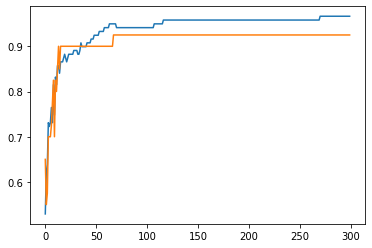

In [ ]:
import numpy as np
sc = SGDClassifier(loss='log', random_state=42)
train_score = [] # 훈련 세트 점수
test_score = [] # 테스트 세트 점수
classes = np.unique(train_target) # 7개 종류의 생선 목록 만듬

for _ in range(0,300): # _ 임시 변수, 300번의 에포크 동안 훈련
  sc.partial_fit(train_scaled, train_target, classes=classes) # 훈련
  train_score.append(sc.score(train_scaled, train_target)) # 훈련 점수 -> 추가
  test_score.append(sc.score(test_scaled, test_target)) # 테스트 점수 -> 추가

# 점수 그래프
import matplotlib.pyplot as plt
plt.plot(train_score)
plt.plot(test_score)
plt.show() # 100번째 에포크 이후 점수차 생김

In [ ]:
# 에포크 횟수 100에 맞추어 다시 모델 훈련
sc = SGDClassifier(loss='log', max_iter=100, tol=None, random_state=42)
sc.fit(train_scaled, train_target)
print(sc.score(train_scaled, train_target)) 
print(sc.score(test_scaled, test_target))
# 정확도가 높게 나옴

0.957983193277311
0.925


## 핵심 패키지와 함수

**1) scikit-learn**

SGDClassifier()
* 확률적 경사 하강법을 사용한 분류 모델을 만듬
* loss 매개변수는 최적화활 손실 함수를 지정함
* 로지스틱 회귀를 위해서는 'log'로 지정함
* 기본값은 서포트 벡터 머신을 위한 'hinge' 손실 함수임
* 힌지 손실, 서포트 벡터 머신이라 불리는 또 다른 머신러닝 알고리즘을 위한 손실함수
* max_iter 매개변수는 에포크 횟수를 지정함
* 기본값은 1000임
* tol 매개변수는 반복을 멈출 조건임

SGDRegressor()
* 확률적 경사 하강법을 사용한 회귀 모델을 만듬
* loss 매개변수의 기본값은 제곱 오차를 나타내는 squared_loss임


In [ ]:
# 힌지 손실을 사용한 모델
sc = SGDClassifier(loss='hinge', max_iter=100, tol=None, random_state=42)
sc.fit(train_scaled, train_target)
print(sc.score(train_scaled, train_target))
print(sc.score(test_scaled, test_target))

0.9495798319327731
0.925
